In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def trayectoria_2_2(x0, y0, vx0, vy0, t, dt, delta_R, m, R1, B1, q = 1, M = 1):

    x = np.zeros(len(t))
    y = np.zeros(len(t))
    R_real = np.zeros(len(t))
    angulo = np.zeros(len(t))
    
    x[0], y[0] = x0, y0
    vx, vy = vx0, vy0
    R_real[0] = np.sqrt(x0**2 + y0**2)
    angulo[0] = np.arctan2(y0,x0)
    
    for i in range(len(t)-1):

        # 1. Ángulo actual
        theta_actual = np.arctan2(y[i], x[i])

        theta_grados = np.degrees(theta_actual)

        if theta_grados < 0:
            theta_grados += 360

        # 2. Cambio de la pendiente según el ángulo
        if (0 <= theta_grados < 60) or (120 <= theta_grados < 180) or (240 <= theta_grados < 300):
            m_actual = m  
        else:
            m_actual = -1*m

        angulo[i] = theta_grados

        # 3. Radio inicial
        R_inicial = np.sqrt(x[i]**2 + y[i]**2)
        
        # 4. Cambio aleatorio en el radio
        R_perturbado = R_inicial + (2*np.random.random() - 1) * delta_R
        
        # 5. Cambio en el campo magnético
        B = m_actual * (R_perturbado - R1) + B1
        
        # 6. Actualización de aceleraciones, velocidades y posiciones
        ax = (q/M) * vy * B
        ay = -(q/M) * vx * B

        vx += ax * dt
        vy += ay * dt
        
        x[i+1] = x[i] + vx * dt
        y[i+1] = y[i] + vy * dt
        
        # 7. Registro del radio real
        R_real[i+1] = np.sqrt(x[i+1]**2 + y[i+1]**2)

    # Último ángulo
    angulo_f = np.arctan2(y[-1], x[-1])
    angulo[-1] = np.degrees(angulo_f)
    
    return x, y, R_real, angulo

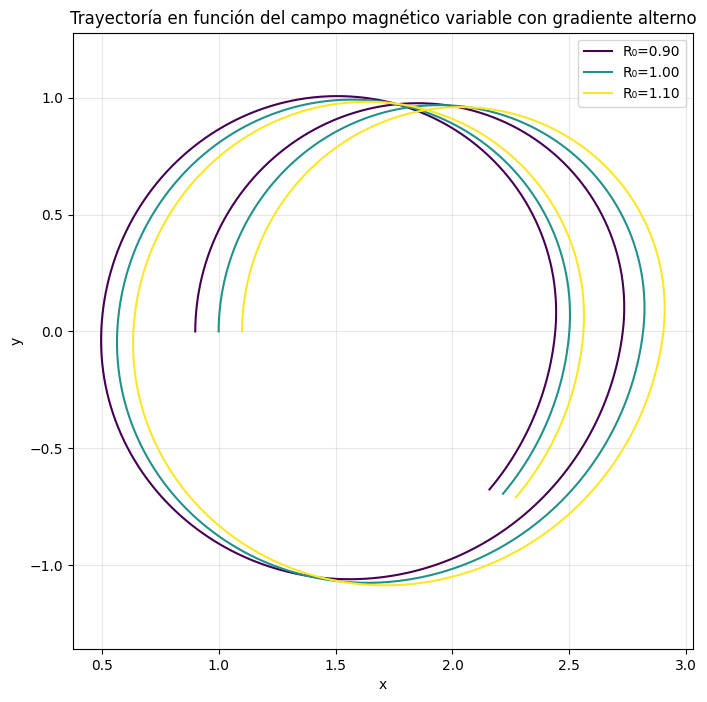

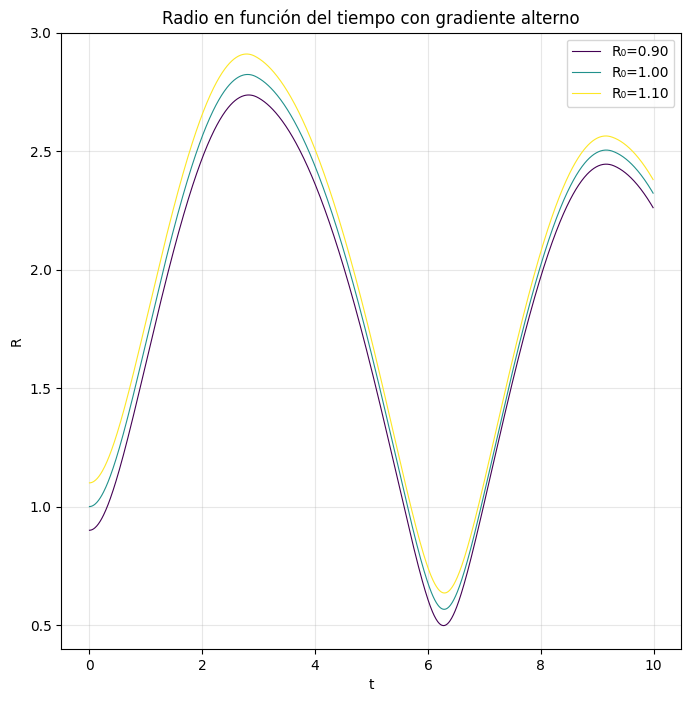

In [ ]:
# Parámetros de simulación

dt = 0.01
t = np.arange(0, 10, dt)

# Parámetros del problema
delta_R = 0.02              
m = 0.1                     
R1 = 1                  
B1 = 1               

# Condiciones iniciales para diferentes radios

x0_vals = np.linspace(0.9, 1.1, 3)
y0 = 0
vx0 = 0
vy0 = 1.0

# Colores para las diferentes condiciones iniciales
colores = plt.cm.viridis(np.linspace(0, 1, len(x0_vals)))

# GRÁFICA 1: Y vs X
plt.figure(figsize=(8, 8))
for i, x0 in enumerate(x0_vals):
    x, y, R, angulo = trayectoria_2_2(x0, y0, vx0, vy0, t, dt, delta_R, m, R1, B1)
    plt.plot(x, y, '-', color=colores[i], label=f'R₀={np.sqrt(x0**2+y0**2):.2f}', alpha=1)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectoría en función del campo magnético variable con gradiente alterno')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# GRÁFICA 2: R vs t
plt.figure(figsize=(8, 8))
for i, x0 in enumerate(x0_vals):
    x, y, R, angulo = trayectoria_2_2(x0, y0, vx0, vy0, t, dt, delta_R, m, R1, B1)
    plt.plot(t, R, color=colores[i], label=f'R₀={np.sqrt(x0**2+y0**2):.2f}', linewidth=0.8)

plt.xlabel('t')
plt.ylabel('R')
plt.title('Radio en función del tiempo con gradiente alterno')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0.4, 3.0) 
plt.show()

#Si bien no se uso el ángulo, sirvio para verificar que estuviera cambiando c: